In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

In [57]:
nba_data = pd.read_csv('CSV_files/nba_team_data.csv', index_col = 0)

In [58]:
nba_data = nba_data.reset_index().drop(columns = 'index')

In [59]:
nba_data.columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'TEAM', 'AGE', 'W', 'SOS', 'PACE', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%',
       'ORB%', 'FT/FGA', 'D_eFG%', 'D_TOV%', 'DRB%', 'D_FT/FGA', 'SEASON'],
      dtype='object')

What aspects of player statistics most directly lead to winning in the modern NBA.

The idea behind the data is to take a look a ton of nba player statistics, as well as some nba team information, for seasons between 2014-2019 (6 seasons) to see what most directly leads to wins. There are a lot of statistics that directly relate to winning that are available. My approach is to ignore those, as well as other very predictive statistics like net rating or box +/-, which already take into account a ton of the general data when creating the model. This leaves me with most of the standard box score stats, and some of the advanced stats to work with over these 180 teams. 

The other big thing I took into account, which minimized my dataset, was 3 point shooting. The problem with this is that the style of the NBA has dramatically changed in the last year. So much so that a single player in 2019 had more 3 point attempts then 3 entire teams in the early 2010s. Because of this i wanted to limit it to 2014 as that was the first year that the curve of 3 pt shooting started to jump dramatically. 3pt attempts was the only category with a very large jump in this time period (the other was pace but it was not as drastic of an increase)

3 Questions for EDA

- In the modern NBA 3 pt shooting and pace have been steadily growing in the last 6 years so will they be big proponents to winning in the nba now or is it done by so many teams that it will not end up having much of an effect at all

- Which ratings specifically will have the highest correlation to wins

- Will shooting percentages from different areas of the floor be too closely correlated to eachother to have an affect on the wins

# Target and Feature Variables (General)

In [27]:
X = nba_data['W']
y = nba_data.drop(columns = ['W', 'TEAM', 'SEASON'])

# EDA using graphs and correlations

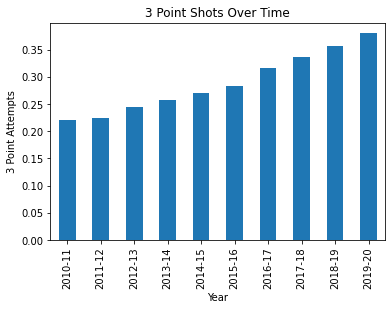

In [35]:
nba_data.groupby('SEASON')['3PAr'].mean().plot.bar()

shooting_over_time = nba_data.groupby('SEASON')['3PAr'].mean()

ax = shooting_over_time.plot.bar(y = 'mean')
ax.set_ylabel('3 Point Attempts')
ax.set_xlabel('Year')
ax.set_title('3 Point Shots Over Time')

plt.savefig('3_pointers.png')

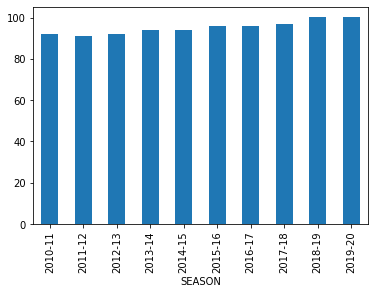

In [37]:
nba_data.groupby('SEASON')['PACE'].mean().plot.bar()

Viewing some data grouped by team to see if any teams fall outside the standard deviation in any category

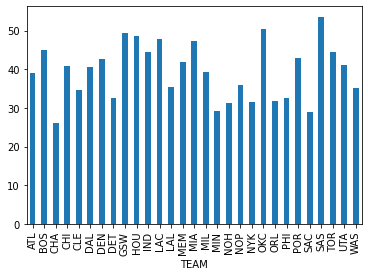

In [38]:
nba_data.groupby('TEAM')['W'].mean().plot.bar()

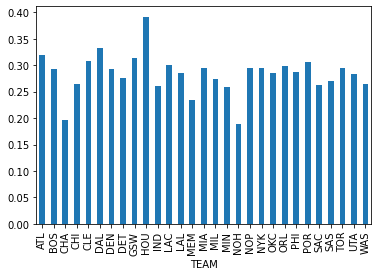

In [39]:
nba_data.groupby('TEAM')['3PAr'].mean().plot.bar()

Plotting all features against the Wins

In [40]:
n = 4
row_groups= [y.columns[i:i+n] for i in range(0, len(y.columns), n) ]

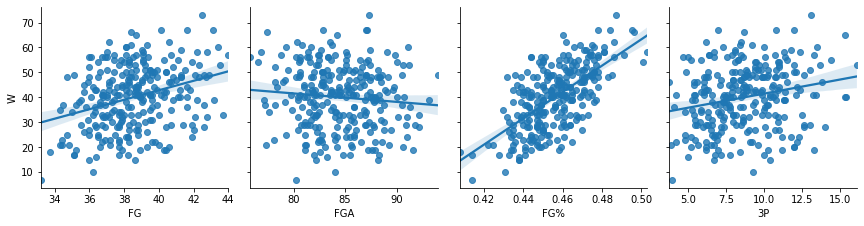

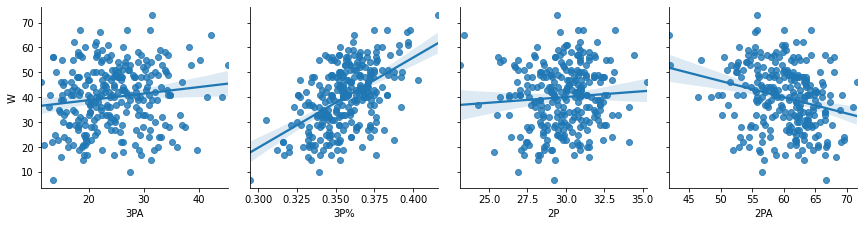

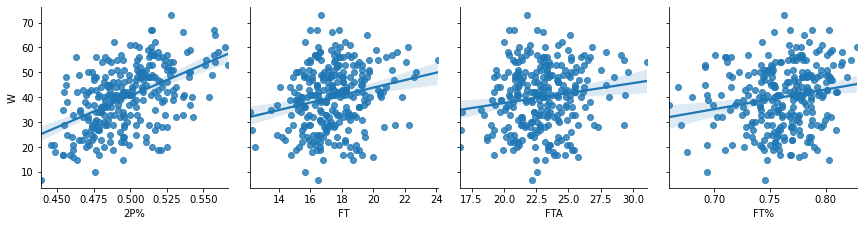

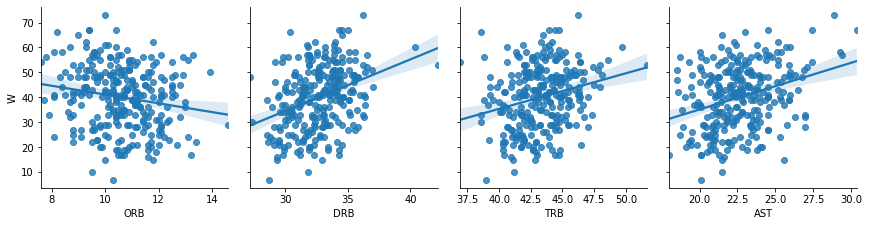

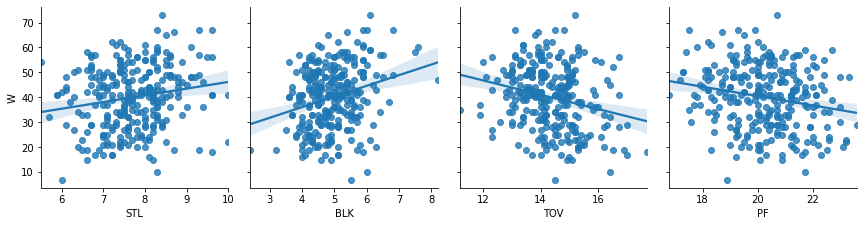

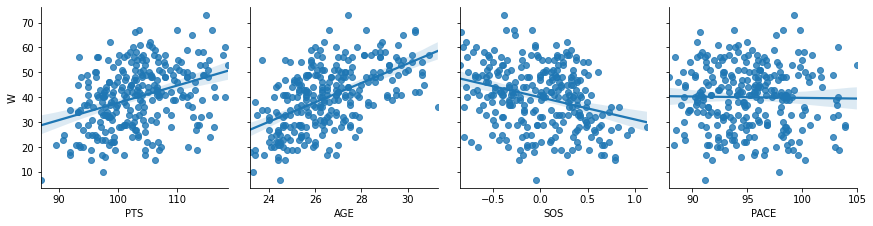

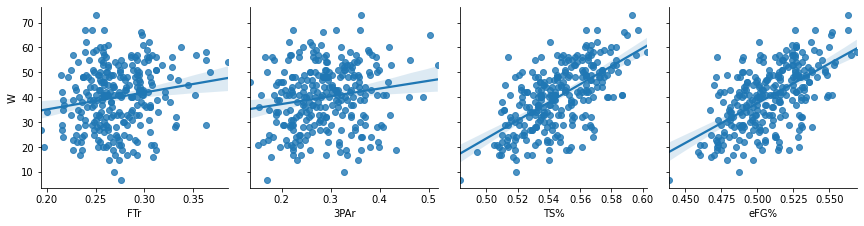

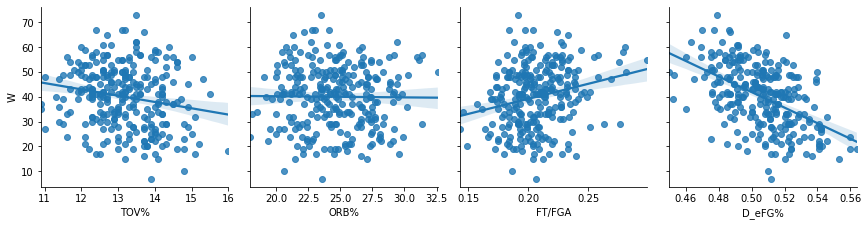

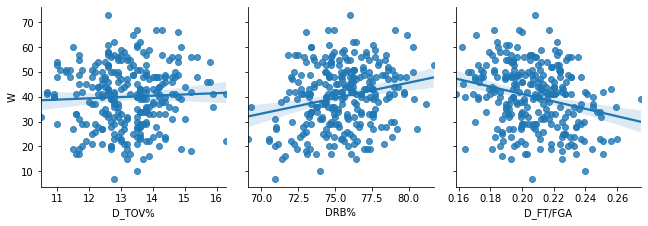

In [41]:
for i in row_groups:
    pp = sns.pairplot(data=nba_data, y_vars=['W'], x_vars=i, kind="reg", height=3)

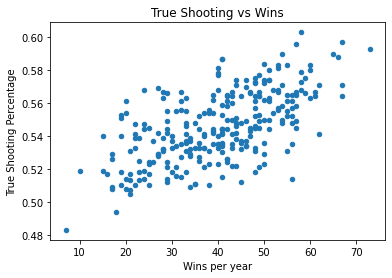

In [42]:
ax2 = nba_data.plot.scatter('W', 'TS%')
ax2.set_ylabel('True Shooting Percentage')
ax2.set_xlabel('Wins per year')
ax2.set_title('True Shooting vs Wins')

plt.savefig('TS%.png')

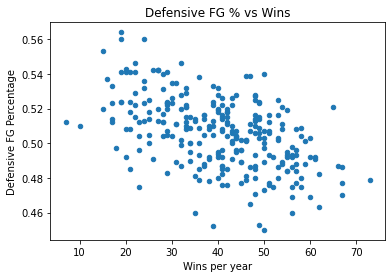

In [47]:
ax2 = nba_data.plot.scatter('W', 'D_eFG%')
ax2.set_ylabel('Defensive FG Percentage')
ax2.set_xlabel('Wins per year')
ax2.set_title('Defensive FG % vs Wins')

plt.savefig('DFG%.png')

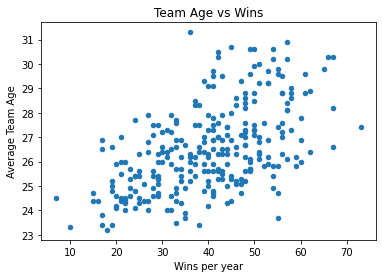

In [49]:
ax2 = nba_data.plot.scatter('W', 'AGE')
ax2.set_ylabel('Average Team Age')
ax2.set_xlabel('Wins per year')
ax2.set_title('Team Age vs Wins')

plt.savefig('Age.png')

Looking for high correlations between the features and price then the features alone

In [50]:
# Create correlation matrix
corr_matrix = nba_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,D_eFG%,D_TOV%,DRB%,D_FT/FGA
FG,NaN,0.794378,0.645355,0.663009,0.632420,0.353566,0.255353,0.280775,0.785173,0.020576,...,0.562763,0.713453,0.773848,0.442612,0.352333,0.259495,0.372015,0.266237,0.477082,0.284209
FGA,NaN,NaN,0.049792,0.650649,0.686331,0.011034,0.041349,0.205266,0.395462,0.087703,...,0.587899,0.265744,0.350624,0.515257,0.255251,0.433901,0.548892,0.307824,0.446877,0.209557
FG%,NaN,NaN,NaN,0.273259,0.179267,0.565418,0.366530,0.206054,0.796464,0.145421,...,0.188726,0.840202,0.833216,0.081829,0.259985,0.119775,0.074351,0.043114,0.219234,0.201672
3P,NaN,NaN,NaN,NaN,0.984789,0.382168,0.554213,0.857908,0.711378,0.014458,...,0.981381,0.690840,0.754388,0.334901,0.533505,0.217730,0.413131,0.295645,0.558817,0.302314
3PA,NaN,NaN,NaN,NaN,NaN,0.222721,0.569143,0.852645,0.685138,0.026978,...,0.991117,0.613554,0.678608,0.325746,0.513323,0.218896,0.461137,0.288419,0.558817,0.291384
3P%,NaN,NaN,NaN,NaN,NaN,NaN,0.099535,0.291875,0.341647,0.075547,...,0.251173,0.606638,0.620144,0.154685,0.287110,0.072910,0.140325,0.108469,0.174772,0.137394
2P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795249,0.044694,0.004582,...,0.641928,0.097581,0.112464,0.060315,0.297546,0.006443,0.121063,0.087673,0.192654,0.074526
2PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.638378,0.099171,...,0.911424,0.635070,0.661749,0.068244,0.506226,0.016936,0.225939,0.167094,0.430973,0.242339
2P%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179170,...,0.687910,0.918595,0.941867,0.190345,0.446245,0.026571,0.217658,0.163689,0.454239,0.309061
FT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041422,0.309340,0.114307,0.038801,0.198021,0.934541,0.016990,0.100102,0.097438,0.099971


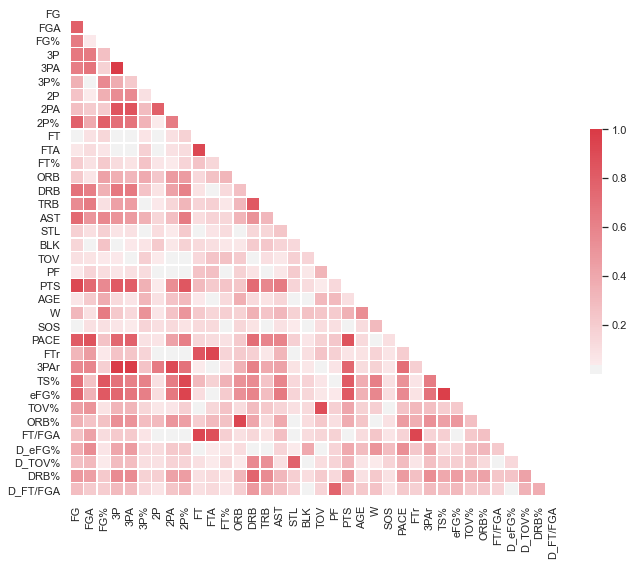

In [51]:
sns.set(style="white")


# Compute the correlation matrix
corr = np.abs(nba_data.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Due to high relation between some of the features FG%, FGA, Dft/fga, PF, Dfg%, Dtov%, were removed as they had the least correlation between the 2 colinear items. On top of that looking at them logically items like AST and BLK etc, had better versions of their stats in the AST% or BLK% which accounts for pace of the game as well.

In [60]:
nba_data.drop(columns = ['FG', 'FGA', 'FG%', '2P%', '2P', '2PA', 'TOV', 'eFG%', 
                         'FT', 'FTA', '3P', 'DRB', 'ORB', 'TOV', '3PA', 'FTr',
                         '3P'], inplace = True)

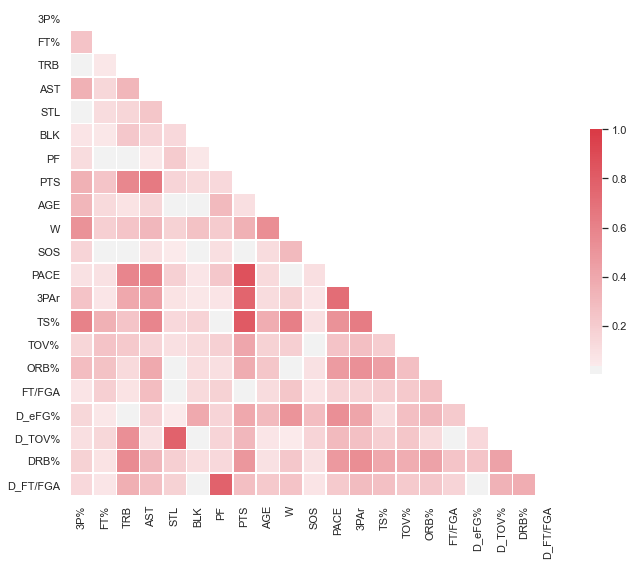

In [61]:
sns.set(style="white")


# Compute the correlation matrix
corr = np.abs(nba_data.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
# Create correlation matrix
corr_matrix = nba_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,3P%,FT%,TRB,AST,STL,BLK,PF,PTS,AGE,W,...,PACE,3PAr,TS%,TOV%,ORB%,FT/FGA,D_eFG%,D_TOV%,DRB%,D_FT/FGA
3P%,NaN,0.256613,0.024159,0.358098,0.032624,0.071840,0.121207,0.354956,0.326776,0.520615,...,0.087975,0.251173,0.606638,0.154685,0.287110,0.072910,0.140325,0.108469,0.174772,0.137394
FT%,NaN,NaN,0.060082,0.144668,0.117796,0.060485,0.025291,0.249081,0.131280,0.191763,...,0.087864,0.068874,0.351222,0.252331,0.263308,0.194524,0.057073,0.146402,0.080577,0.065015
TRB,NaN,NaN,NaN,0.320475,0.150316,0.233491,0.020300,0.580161,0.084580,0.246781,...,0.588410,0.397961,0.247974,0.222691,0.126799,0.084400,0.030271,0.529788,0.560130,0.360549
AST,NaN,NaN,NaN,NaN,0.234987,0.156803,0.058201,0.646421,0.155046,0.318468,...,0.597156,0.436784,0.590175,0.161795,0.394668,0.281398,0.159319,0.101166,0.313074,0.266361
STL,NaN,NaN,NaN,NaN,NaN,0.137453,0.205141,0.159418,0.030782,0.179093,...,0.184747,0.083779,0.136400,0.099312,0.031644,0.017152,0.043327,0.777612,0.193357,0.171858
BLK,NaN,NaN,NaN,NaN,NaN,NaN,0.057299,0.124928,0.023876,0.263223,...,0.068775,0.059227,0.167942,0.130785,0.116753,0.125223,0.395484,0.022811,0.110715,0.020018
PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134575,0.301222,0.204874,...,0.232758,0.072635,0.017021,0.184467,0.108644,0.174957,0.159853,0.160362,0.135800,0.772563
PTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104775,0.356232,...,0.865523,0.755732,0.818886,0.407631,0.377760,0.012577,0.397649,0.315881,0.497877,0.273145
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544470,...,0.129523,0.117969,0.373358,0.174047,0.236428,0.119906,0.296195,0.064778,0.088095,0.221559
W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016206,0.172159,0.617797,0.190128,0.010402,0.235381,0.509906,0.045723,0.226773,0.254119


In [63]:
nba_data.to_csv('CSV_files/cleaned_nba_data.csv')